<a href="https://colab.research.google.com/github/aksiitbhu/Machine-Learning-2024/blob/main/Taxi_Fare_Prediction(Regression)_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Steps in the Machine Learning Projects***

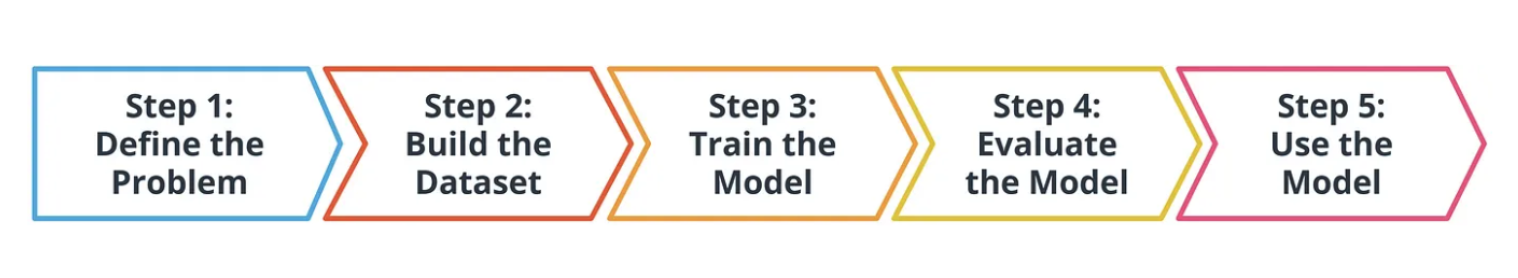

# **Problem Statement: Project for Regression Task using Neural Networks**



***Scenario:*** Imagine that you work for a taxi company, and that one of your customers' biggest complaints is that they don't know how much a ride will cost until it's over. That's because distance is just one of several factors from which taxi fares are calculated. You decide to do something about it by building a mobile app that customers can use when they climb into a taxi to estimate what the fare will be. To provide the smarts for the app, you intend to use the massive amounts of fare data the company has collected over the years to train a neural network. Let's use a portion of a larger taxi-fare dataset from New York City to train the network to predict a fare amount given the time of day, the pickup and dropoff locations, and other information.

![](Images/nyc.jpg)

# ***STEP-1: Problem Definition***
# Taxi-fare Prediction in New York City

# ***STEP-2: Build the Dataset***

# **Load and prepare data**

Start by loading the dataset and shaping it so that it's suitable for use in machine learning. This dataset is a subset of a much larger dataset containing more than 100 million rows. Recently, the larger dataset was used in Kaggle's [New York City Taxi Fare Prediction](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction) competition. The data requires a fair amount of preprocessing work before it's of any use at all — something that is not uncommon in machine learning. Data scientists often find that collecting and preparing data accounts for 90% or more of their time.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title Default title text
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

df = pd.read_csv('drive/MyDrive/Datasets/taxi-fares.csv')
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2014-06-15 17:11:00.000000107,7.0,2014-06-15 17:11:00 UTC,-73.995420,40.759662,-73.987607,40.751247,1
1,2011-03-14 22:43:00.00000095,4.9,2011-03-14 22:43:00 UTC,-73.993552,40.731110,-73.998497,40.737200,5
2,2011-02-14 15:14:00.00000067,6.1,2011-02-14 15:14:00 UTC,-73.972380,40.749527,-73.990638,40.745328,1
3,2009-10-29 11:29:00.00000040,6.9,2009-10-29 11:29:00 UTC,-73.973703,40.763542,-73.984253,40.758603,5
4,2011-07-02 10:38:00.00000028,10.5,2011-07-02 10:38:00 UTC,-73.921262,40.743615,-73.967383,40.765162,1


How many rows and columns does the dataset contain?

In [ ]:
df.shape

(55368, 8)

Are any of the columns missing values?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55368 entries, 0 to 55367
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                55368 non-null  object 
 1   fare_amount        55368 non-null  float64
 2   pickup_datetime    55368 non-null  object 
 3   pickup_longitude   55368 non-null  float64
 4   pickup_latitude    55368 non-null  float64
 5   dropoff_longitude  55368 non-null  float64
 6   dropoff_latitude   55368 non-null  float64
 7   passenger_count    55368 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.4+ MB


Draw a histogram showing how many rows contain a passenger count of 1, how many contain a passenger count of 2, and so on.

<Axes: xlabel='passenger_count', ylabel='count'>

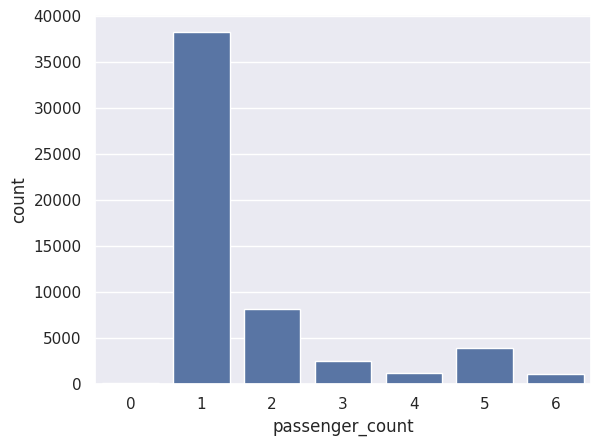

In [ ]:
sns.countplot(x=df['passenger_count'])

Most of the rows in the dataset have a passenger count of 1. Remove all rows with multiple passengers and remove the "key" column from the dataset.

In [ ]:
df = df[df['passenger_count'] == 1]
df = df.drop(['key', 'passenger_count'], axis=1)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,7.0,2014-06-15 17:11:00 UTC,-73.995420,40.759662,-73.987607,40.751247
2,6.1,2011-02-14 15:14:00 UTC,-73.972380,40.749527,-73.990638,40.745328
4,10.5,2011-07-02 10:38:00 UTC,-73.921262,40.743615,-73.967383,40.765162
5,15.3,2011-12-09 20:03:00 UTC,-73.973500,40.792610,-73.936035,40.856548
8,7.7,2011-04-02 01:05:15 UTC,-73.979564,40.735405,-73.955686,40.768065


How many rows and columns are left in the dataset?

In [ ]:
df.shape

(38233, 6)

Find out how much influence input variables such as `latitude` and `longitude` have on the values in the "fare_amount" column.

In [ ]:
df1=df[['fare_amount', 'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']]
corr_matrix = df1.corr()
corr_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
fare_amount,1.000000,0.015742,-0.015915,0.020438,-0.021711
pickup_longitude,0.015742,1.000000,-0.974220,0.948185,-0.933444
pickup_latitude,-0.015915,-0.974220,1.000000,-0.933960,0.958464
dropoff_longitude,0.020438,0.948185,-0.933960,1.000000,-0.978209
dropoff_latitude,-0.021711,-0.933444,0.958464,-0.978209,1.000000


The numbers don't look very encouraging. Latitudes and longitudes have little to do with fare amounts, at least in their present form. And yet intuitively, they should have a *lot* do with fare amounts since they specify starting and ending points and longer rides incur higher fares.

Now comes the fun part: creating whole new columns of data that have more impact on the outcome — columns whose values are computed from values in other columns. Add columns specifying the day of the week (0=Monday, 1=Sunday, and so on), the hour of the day that the passenger was picked up (0-23), and the distance (through the air, not on the street) in miles that the ride covered. To compute distances, this code assumes that most rides are short and that it is therefore safe to ignore the curvature of the earth.

In [ ]:
corr_matrix['fare_amount'].sort_values(ascending=False)

,fare_amount
fare_amount,1.000000
dropoff_longitude,0.020438
pickup_longitude,0.015742
pickup_latitude,-0.015915
dropoff_latitude,-0.021711


In [ ]:
import datetime
from math import sqrt


for i, row in df.iterrows():
    dt = datetime.datetime.strptime(row['pickup_datetime'], '%Y-%m-%d %H:%M:%S UTC')
    df.at[i, 'day_of_week'] = dt.weekday()
    df.at[i, 'pickup_time'] = dt.hour
    x = (row['dropoff_longitude'] - row['pickup_longitude']) * 54.6 # 1 degree == 54.6 miles
    y = (row['dropoff_latitude'] - row['pickup_latitude']) * 69.0   # 1 degree == 69 miles
    distance = sqrt(x**2 + y**2)
    df.at[i, 'distance'] = distance

df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,day_of_week,pickup_time,distance
0,7.0,2014-06-15 17:11:00 UTC,-73.995420,40.759662,-73.987607,40.751247,6.0,17.0,0.720497
2,6.1,2011-02-14 15:14:00 UTC,-73.972380,40.749527,-73.990638,40.745328,0.0,15.0,1.038136
4,10.5,2011-07-02 10:38:00 UTC,-73.921262,40.743615,-73.967383,40.765162,5.0,10.0,2.924341
5,15.3,2011-12-09 20:03:00 UTC,-73.973500,40.792610,-73.936035,40.856548,4.0,20.0,4.862893
8,7.7,2011-04-02 01:05:15 UTC,-73.979564,40.735405,-73.955686,40.768065,5.0,1.0,2.603493


Remove columns that are no longer needed.

In [ ]:
df.drop(columns=['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], inplace=True)
df.head()

KeyError: "['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'] not found in axis"

Run a correlation again.

In [ ]:
corr_matrix = df.corr()
corr_matrix["fare_amount"].sort_values(ascending=False)

,fare_amount
fare_amount,1.000000
distance,0.045873
day_of_week,0.009196
pickup_time,-0.019722


There still isn't a strong correlation between distance traveled and fare amount. Perhaps this will provide some clue as to why:

In [ ]:
df.describe()

,fare_amount,day_of_week,pickup_time,distance
count,38233.000000,38233.000000,38233.000000,38233.000000
mean,11.214115,2.951534,13.387989,12.018397
std,9.703149,1.932809,6.446519,217.357022
min,-22.100000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,9.000000,0.762116
50%,8.500000,3.000000,14.000000,1.331326
75%,12.500000,5.000000,19.000000,2.402226
max,256.000000,6.000000,23.000000,4923.837280


The dataset contains outliers, and outliers frequently skew the results of machine-learning models (or prevent them from working at all). Filter the dataset by eliminating negative fare amounts and placing reasonable limits on fares and distance.

In [ ]:
df = df[(df['distance'] > 1.0) & (df['distance'] < 10.0)]
df = df[(df['fare_amount'] > 0.0) & (df['fare_amount'] < 50.0)]
df.shape

(23298, 4)

Run a correlation again.

In [ ]:
corr_matrix = df.corr()
corr_matrix["fare_amount"].sort_values(ascending=False)

,fare_amount
fare_amount,1.000000
distance,0.851913
day_of_week,-0.003570
pickup_time,-0.023085


That looks better! The correlation between the day of the week, the hour of the day, and fare amount is still weak, but let's leave those columns in there since it makes sense that it might take longer to get from point A to point B during rush hour, or that traffic at 5:00 p.m. Friday might be different than traffic at 5:00 p.m. on Saturday.

# ***STEP-3: Train the Model***

# Train a neural network

Now it's time build a neural network and train it with the data prepared in the previous exercise. We'll create two hidden layers with 512 neurons each and an input layer that accepts three values: distance, the day of the week, and the time of day. Since the model is designed to predict a fare amount, the output layer will have one neuron.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_dim=3))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 512)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 265,217 (1.01 MB)

 Trainable params: 265,217 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

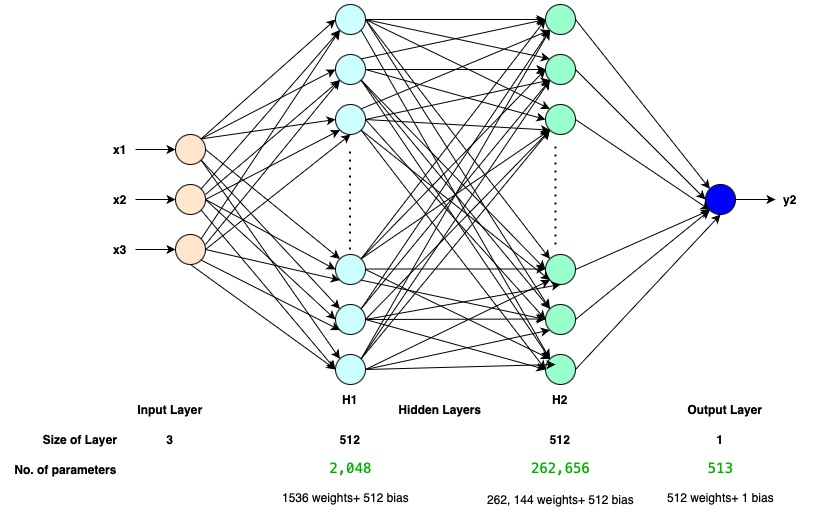

Extract the feature columns and the label column and train the model.

In [ ]:
x = df.drop('fare_amount', axis=1)
y = df['fare_amount']

hist = model.fit(x, y, validation_split=0.2, epochs=10, batch_size=100)

Epoch 1/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 4.0042 - mae: 4.0042 - val_loss: 2.4415 - val_mae: 2.4415
Epoch 2/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.4208 - mae: 2.4208 - val_loss: 2.4276 - val_mae: 2.4276
Epoch 3/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 2.3838 - mae: 2.3838 - val_loss: 2.3595 - val_mae: 2.3595
Epoch 4/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 2.3957 - mae: 2.3957 - val_loss: 2.4064 - val_mae: 2.4064
Epoch 5/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 2.3632 - mae: 2.3632 - val_loss: 2.3787 - val_mae: 2.3787
Epoch 6/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.3973 - mae: 2.3973 - val_loss: 2.3389 - val_mae: 2.3389
Epoch 7/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.3611 - mae: 2.3611 - val_loss: 2.3380 - val_mae: 2.3380
Epoch 8/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 2.3735 - mae: 2.3735 - val_loss: 2.3472 - val_mae: 2.3472
Epoch 9/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step

Plot the training accuracy and validation accuracy over time.

[]

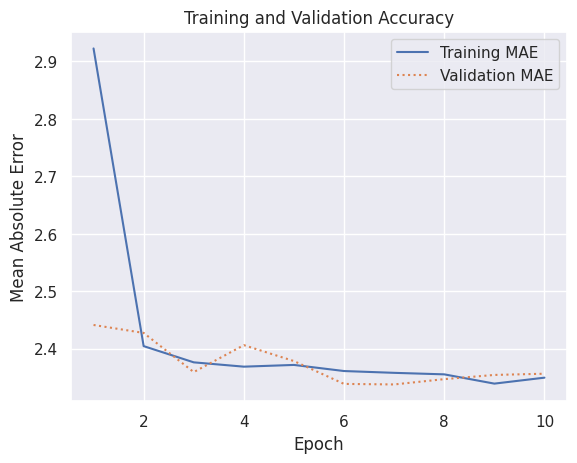

In [ ]:
err = hist.history['mae']
val_err = hist.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# ***STEP-4: Evaluate the Model***

Get the coefficient of determination (R2) to determine how accurate the model is.

In [ ]:
from sklearn.metrics import r2_score

r2_score(y, model.predict(x))

729/729 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


0.7319555633161476

# ***STEP-5: Use the Model***

## Use the model to predict fare amounts

Finish up by using the trained model to make a pair of predictions. First, estimate what it will cost to hire a taxi for a 2-mile trip at 5:00 p.m. on Friday afternoon.

In [ ]:
import numpy as np

model.predict(np.array([[4, 17, 2.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[10.82178]], dtype=float32)

Now predict the fare amount for a 2-mile trip taken at 5:00 p.m. one day later (on Saturday).

In [ ]:
model.predict(np.array([[5, 17, 2.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[10.757373]], dtype=float32)

In [ ]:
model.predict(np.array([[1, 5, 2.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[9.991214]], dtype=float32)

In [ ]:
model.predict(np.array([[2, 3, 2.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[9.355243]], dtype=float32)

Does the model predict a higher or lower fare amount for the same trip on Saturday afternoon? Does this make sense given that the data comes from a New York City cab company?

# ***Thanks***